In [1]:
#Import of the libraries that we need
import pyshtools as pysh
import matplotlib.pyplot as plt
from cartopy import crs as ccrs
import pygmt
from palettable import scientific as scm
import numpy as np
import h5py
import matplotlib.gridspec as gridspec
import poincare
import null_challenge
import vtk_utils

C:\Users\Annze\anaconda3\envs\spyder\lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


In [2]:
#Import the dataset that was created by Tsunakawa et al. 2015 - Spherical harmonic expansion of the global magnetic field
pysh.utils.figstyle(rel_width=0.75) 
clm = pysh.datasets.Moon.T2015_449()
clm.info() 
#creation of the grid and initialization of parameters
grid = clm.expand() #creating the grid
Nlat = grid.nlat #latitude
Nlon = grid.nlon #longitude
#initialization of the magnetic field
Nz=10
Bx=np.zeros((Nlat,Nlon,Nz))
By=np.zeros((Nlat,Nlon,Nz))
Bz=np.zeros((Nlat,Nlon,Nz))
height=np.zeros(Nz)

kind = 'real'
normalization = 'schmidt'
csphase = 1
lmax = 449
r0 (m) = 1737400.0
error_kind = None
header = ['1737.4e3', '449']
header2 = None
name = 'T2015_449'
units = 'nT'
year = None
901 1801


In [3]:
r= clm.r0 #mean radius of the Moon
for iz in range(0,Nz):
    height[iz]=r+iz*1e4 #here we choose the grid step
    grid = clm.expand(a=height[iz])
    xgrid=grid.to_xarray()  #generates array
    #Here we create the matrices for the magnetic field components
    Bz[:,:,iz] = xgrid.radial.values
    By[:,:,iz] = xgrid.theta.values 
    Bx[:,:,iz] = xgrid.phi.values

In [4]:
#Computation of the total magnetic field and its regional analysis
B = np.sqrt(Bx**2+By**2+Bz**2) #global total magnetic intensity
#Regional analysis of the total magnetic field
#The regions were selected by studying the global map of the total magnetic field that was created by the previous script
B_Crisium = B[500:700,600:900,:] 
B_Orientale = B[500:700,900:1100,:]
B_Imbrium = B[500:600,1100:1250,:]
B_Serenitatis = B[300:450,300:550,:]
B_Isolated = B[450:550,0:150,:]

In [5]:
#Finding points with mangetic intensity lower than 0.09nT
n=0
for i in range(0,100):
    for j in range(0,150):
        for k in range(0,Nz):
            if B_Crisium[i,j,k]<0.09:
                n=n+1
                    #print('Position of low magnetic intensity point:',i,j,k)

In [6]:
#Print number of points with very low magnetic intensity
print(n)

322


In [6]:
#Here we find the points where all the three magnetic components change sign - we consider different heights and locations
res1 = []
res2 = []
res3 = []
#Several areas on the lunar surface were investigated here
Bx1 = Bx[500,600:900,8]
By1 = By[500,600:900,8]
Bz1 = Bz[500,600:900,8]
for idx in range(0, len(Bx1) - 1):
    # checking for successive opposite index
    if Bx1[idx] > 0 and Bx1[idx + 1] < 0 or Bx1[idx] < 0 and Bx1[idx + 1] > 0:
        res1.append(idx)
    if By1[idx] > 0 and By1[idx + 1] < 0 or By1[idx] < 0 and By1[idx + 1] > 0:
        res2.append(idx)
    if Bz1[idx] > 0 and Bz1[idx + 1] < 0 or Bz1[idx] < 0 and Bz1[idx + 1] > 0:
        res3.append(idx)
# printing the points where magnetic components change sign
print("Sign shift indices Bx: " + str(res1))
print("Sign shift indices By: " + str(res2))
print("Sign shift indices Bz: " + str(res3))


Sign shift indices Bx: [29, 65, 95, 117, 124, 149, 165, 208, 243, 252, 287, 292]
Sign shift indices By: [129, 150, 174, 246, 273]
Sign shift indices Bz: [5, 55, 74, 136, 158, 190, 235, 241, 271]


In [7]:
#Here we find the points where all three components change sign
Common_el = list(set(res1).intersection(res2,res3))
print(Common_el)

[]


Text(0, 0.5, 'Magnetic components (nT)')

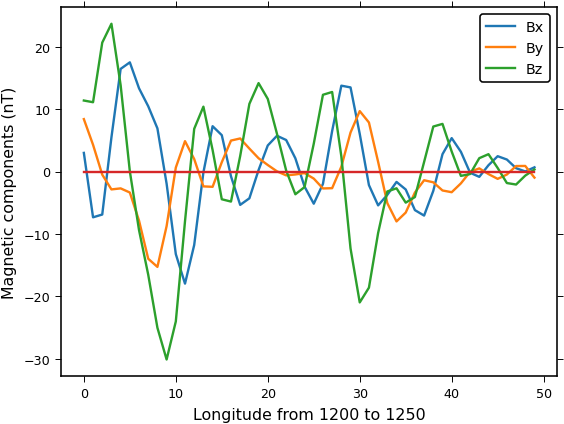

In [8]:
#Plot of the three magnetic components at the four points of interest that were discussed in my thesis
plt.plot(Bx[500,1200:1250,0], label='Bx')
plt.plot(By[500,1200:1250,0], label='By')
plt.plot(Bz[500,1200:1250,0], label='Bz')
y = np.zeros(50)
plt.plot(y)
plt.legend()
plt.xlabel("Longitude from 1200 to 1250")
plt.ylabel("Magnetic components (nT)")

Text(0, 0.5, 'Total magnetic intensity (nT)')

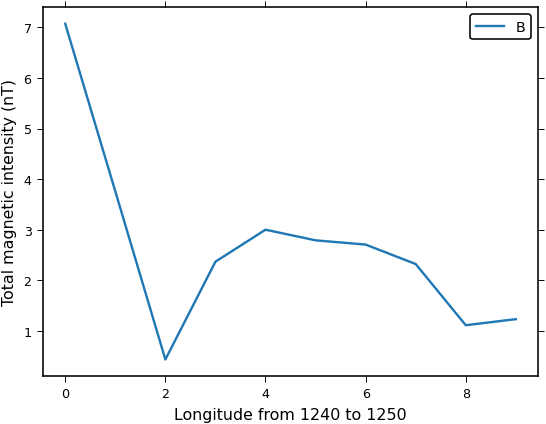

In [26]:
#Plot of the total magnetic field around points of interest
plt.plot(B[500,1240:1250,0], label='B')
plt.legend()
plt.xlabel("Longitude from 1240 to 1250")
plt.ylabel("Total magnetic intensity (nT)")

In [11]:
#Here I use the Poincare method to investigate null points - The code can be found here https://bitbucket.org/volshevsky/magneticnullchallenge/src/master/
#The dataset that I use here contain the four points of interest that were found
case = r'000001'
finder = null_challenge.locate_in_grid(r'Point_of_interest_1_3.vtk', case, save_csv=True)
#The matrix created by the data of Point of interest 1 is singular so the method can't be used
#For the other three points, due to the fact that their value is not exactly zero, they are not found as null points.

Reading arrays  ['B']  from VTK file  Point_of_interest_1_3.vtk
Reading VTK file  Point_of_interest_1_3.vtk
Processing array  B
Reading file Point_of_interest_1_3.vtk
Reading VTK file  Point_of_interest_1_3.vtk
Processing array  B
Nulls found: 0
Saving nulls to csv...
writeCSV: nothing to save!
